In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

art = pd.read_csv("data/articles_processed.csv")                 # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")               # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [10]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="Customer_Id", how="inner")
    .merge(art, on="Article_Id", how="inner")
)
analysis_master.shape

(804149, 27)

In [11]:
pd.set_option('display.max_columns', None)
analysis_master.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50s,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20s,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30s,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,False,False,Active,NaN,19,10s,682771,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30s,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


### 주요 사용 컬럼
- Customer_Id
- Sales_Channel_Id
- Age
- Age_Group
- Product_Type_Info

## 시각화

In [12]:
df = analysis_master.copy()

In [13]:
df['Sales_Channel_Id'] = df['Sales_Channel_Id'].replace({1: '오프라인', 2: '온라인'})
df['Age_Group'] = df['Age_Group'].replace({'10s': '10대', '20s': '20대', '30s': '30대', '40s': '40대', '50s': '50대', '60s+': '60대+'})
df['Age_Group']

0         50대
1         20대
2         30대
3         10대
4         30대
         ... 
804144    20대
804145    30대
804146    40대
804147    50대
804148    40대
Name: Age_Group, Length: 804149, dtype: object

### 채널별 판매량 비교

In [14]:
channel_cnt = df.groupby('Sales_Channel_Id').size().reset_index(name='Purchase_Cnt')

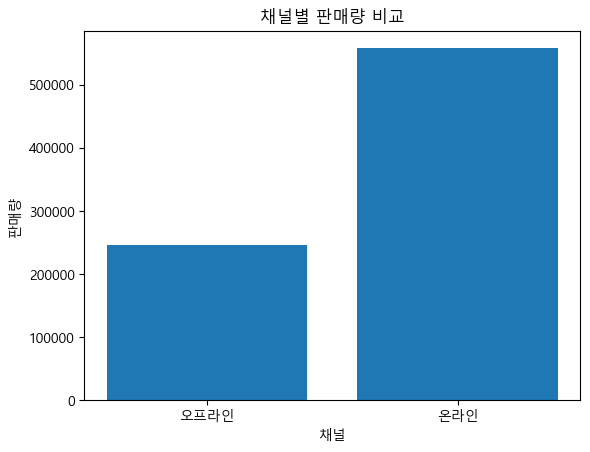

In [15]:
plt.bar(channel_cnt['Sales_Channel_Id'], channel_cnt["Purchase_Cnt"])
plt.title("채널별 판매량 비교")
plt.xlabel("채널")
plt.ylabel("판매량")
plt.show()

### 연령대별 판매량 비교

In [16]:
age_cnt = df.groupby('Age_Group').size().reset_index(name='Purchase_Cnt')
age_cnt

,Age_Group,Purchase_Cnt
0,10대,13706
1,20대,329595
2,30대,163944
3,40대,125414
4,50대,134553
5,60대+,36937


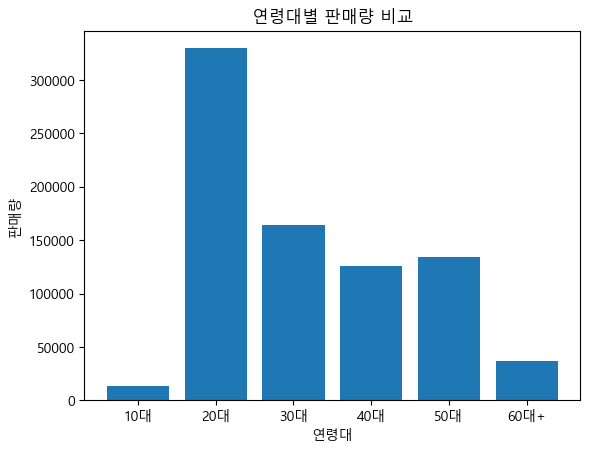

In [17]:
plt.bar(age_cnt['Age_Group'], age_cnt["Purchase_Cnt"])
plt.title("연령대별 판매량 비교")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.show()

# 연령대별 매출액 비교

In [18]:
age_revenue = df.groupby('Age_Group')['Revenue'].sum().reset_index(name='Total_Revenue')

age_revenue = age_revenue.sort_values(by='Total_Revenue', ascending=False)
display(age_revenue)

,Age_Group,Total_Revenue
1,20대,8671.755443
2,30대,4391.867247
4,50대,3746.465265
3,40대,3305.217791
5,60대+,1053.008524
0,10대,319.993372


# 스웨덴 20 30대 연령층 세전 연간 평균 소득 
출처 : 스웨덴 통계청 자료 

### 2019년 스웨덴 연령별 소득 (환율 123.68원 기준)

| 연령대 | 월 평균 소득 (SEK) | 한화 환산 (세전) | 한화 환산 (세후 예상) |
| :--- | :--- | :--- | :--- |
| **20대** | 약 24,290 | 약 300만 원 | **약 220만 원** |
| **30대** | 약 40,315 | 약 498만 원 | **약 350만 원** |

출처 : 스웨덴 통계청 2019년 자료

20대 소득 대비 약 5.2% / 30대 소득 대비 약 4.6% 소비

30대가 20대 보다

30대 소득이 20대보다 훨씬 높은데도 판매량이 20대의 절반 수준인 이유는 뭘까?

1. 30대 소득 안정기에 접어들면 SPA 제품보단 질 좋은 브랜드로 옯겨간다.
예) COS와 Arket도 H&M 그룹 브랜드지만, 데이터상 다르게 집계됨

2. 옷을 '자주' 사기보단 '오래'입을 수 있는 프리미엄 소재 선호>구매 종류가 중요할 듯

3. 20대는 저렴한 가격의 트렌디한 아이템을 여러개 구매하여 판매량이 높게 찍히고, 30대는 단가가 높은 제품을 소량 구매하여 판매량은 낮고 매출액 비중은 높게 나타남. 
ㄴ 아래 시각화 했으나 판매량, 매출액 기준 모두 20대가 30대 보다 높게 나옴 / 따라서 아래 자료 지움



# 30대 주요 지표

주요 지표 계산
- 총 구매건수: 데이터의 전체 행 수
- 구매 종류: Article_Id의 유니크한 개수
- 총 매출액: Price의 합계
- 고객 수: Customer_Id의 유니크한 개수

In [19]:
df_30s = df[df['Age_Group'] == '30대']


total_cnt = len(df_30s)
unique_articles = df_30s['Article_Id'].nunique()
total_revenue = df_30s['Revenue'].sum()
customer_count = df_30s['Customer_Id'].nunique()

# 3. 결과 출력
print(f"[30대 소비 지표 분석 결과]")
print(f"1. 총 구매건수: {total_cnt:,} 건")
print(f"2. 구매 상품 종류: {unique_articles:,} 종")
print(f"3. 평균 구매 단가: {total_revenue / total_cnt:.2f} SEK")
print(f"4. 1인당 평균 구매 건수: {total_cnt / customer_count:.2f} 건")


[30대 소비 지표 분석 결과]
1. 총 구매건수: 163,944 건
2. 구매 상품 종류: 32,732 종
3. 평균 구매 단가: 0.03 SEK
4. 1인당 평균 구매 건수: 2.49 건


# 30대 평균 구매 건수 상위 20% / 하위20%

In [20]:
cust_purchase_cnt = total_cnt / customer_count
cust_purchase_cnt

2.492421363090442

In [21]:
total_cnt = len(df_30s)
unique_articles = df_30s['Article_Id'].nunique()
total_revenue = df_30s['Revenue'].sum()
customer_count = df_30s['Customer_Id'].nunique()

cust_purchase_cnt = total_cnt / customer_count

print(f"1. 총 구매건수: {total_cnt:,} 건")
print(f"4. 1인당 평균 구매 건수: {cust_purchase_cnt:.2f} 건")


1. 총 구매건수: 163,944 건
4. 1인당 평균 구매 건수: 2.49 건


30대 거래량 기준 내림차순 정렬

# 30대 선호 제품 상위 10 / 하위 10


In [22]:
# 상위 10개 
top_10 = df_30s.groupby('Product_Type_Info').size().nlargest(10)

# 3. 하위 10개 
bottom_10 = df_30s.groupby('Product_Type_Info').size().nsmallest(10)

print("30대 선호 품목 TOP 10")
print(top_10)

print("30대 비선호 품목 하위 10")
print(bottom_10)


30대 선호 품목 TOP 10
Product_Type_Info
Trousers (272)            20778
Dress (265)               17236
Sweater (252)             13098
T-shirt (255)             11419
Vest top (253)             8709
Top (254)                  8590
Blouse (258)               7578
Bra (306)                  6909
Shorts (274)               6414
Underwear bottom (286)     5688
dtype: int64
30대 비선호 품목 하위 10
Product_Type_Info
Chem. cosmetics (96)    1
Flat shoes (465)        1
Giftbox (161)           1
Keychain (525)          1
Mobile case (529)       1
Shoulder bag (476)      1
Wood balls (493)        1
Bucket hat (503)        2
Leg warmers (303)       2
Swimwear top (60)       3
dtype: int64


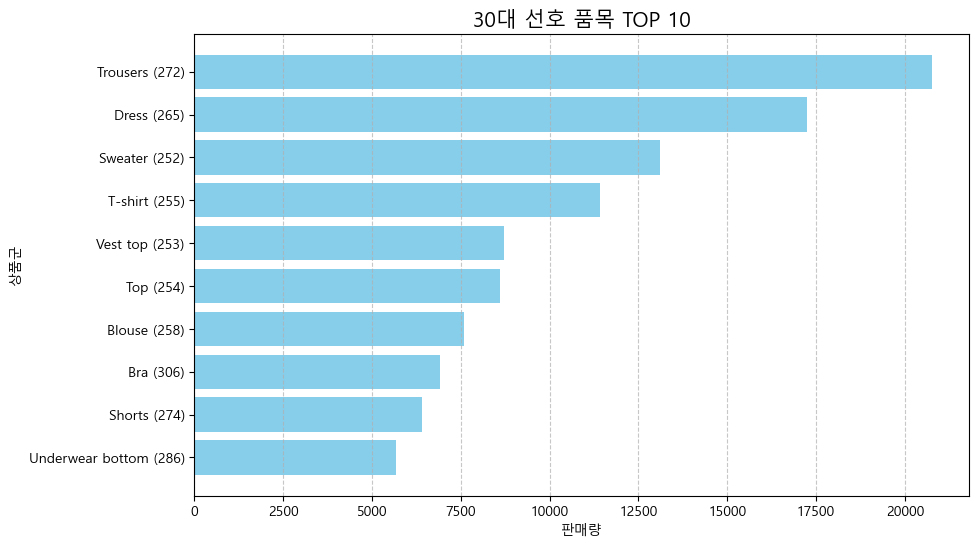

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(top_10.index, top_10.values, color='skyblue') 

plt.gca().invert_yaxis() 
plt.title("30대 선호 품목 TOP 10", fontsize=15)
plt.xlabel("판매량")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.show()

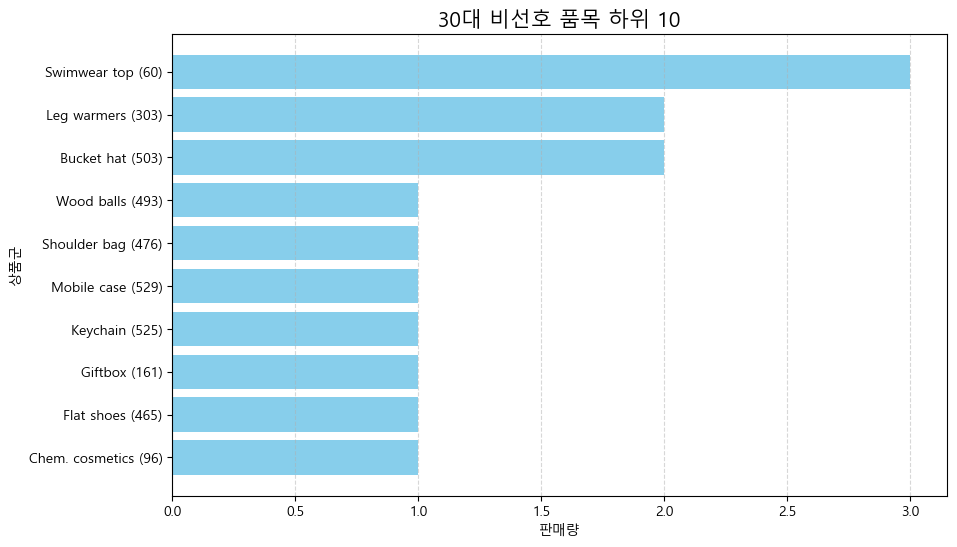

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_10.index, bottom_10.values, color='skyblue') 

plt.title("30대 비선호 품목 하위 10", fontsize=15)
plt.xlabel("판매량")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

trouser / dress / sweater 순으로 인기 항목 
30대 소비 특성 상 비싸더라도 오래 입을 수 있는 옷 선호, 프리미엄 소재 선호 
h&m 에서 이 trouser / dress / sweater 라인들이 비싸고, 프리미엄 라인일까?
 

# 가설검증


1. 30대가 비싼 제품을 샀을 때 프리미엄 소재인가?
- 30대 고객 구매 상품 가격분포 확인. 
- 평균 구매단가가 타 연령대보다 높은지, 고가 상품군 구매 비중이 높은지 산출

2. 프리미엄 여부 
- detail_desc / index_group_name / product_group_name 에서 인기 순위인 Trouser > Dress > Sweater 와 대조하기

# 2030 상품군! 여기서부터 보면 됩니다!!

# 2030 합치기

In [25]:
df_2030 = df[df['Age_Group'].isin(['20대', '30대'])]
df_2030

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,온라인,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20대,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,온라인,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30대,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,오프라인,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30대,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)
5,2019-03-22,437d51082dc72fe41289783e165a2a2a6958ec7bd980b4...,559634009,0.033881,온라인,3,2019-03,03-22,0.033881,middle,False,False,Active,NaN,20,20대,559634,Timeless Padded Swimsuit,Swimsuit (57),Swimwear,Stripe (1010017),White (9),Swimwear (4242),Lingeries/Tights (B),Ladieswear (1),"Womens Swimwear, beachwear (60)",Swimwear (1018)
6,2019-05-08,9d790a34fe05697c2af9c2456d9c2edadcdd42e54f0dda...,559634018,0.033881,온라인,5,2019-05,05-08,0.067746,middle,False,False,Active,NaN,22,20대,559634,Timeless Padded Swimsuit,Swimsuit (57),Swimwear,All over pattern (1010001),Beige (11),Swimwear (4242),Lingeries/Tights (B),Ladieswear (1),"Womens Swimwear, beachwear (60)",Swimwear (1018)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804140,2019-04-24,4687a98340586dbfa2c014c10bdfdd3b4c1067b98a4f8f...,726938001,0.042356,온라인,4,2019-04,04-24,0.111797,top_20,False,False,Active,NaN,24,20대,726938,Marseille padded Swimsuit,Swimsuit (57),Swimwear,Solid (1010016),Black (5),Swimwear (4242),Lingeries/Tights (B),Ladieswear (1),"Womens Swimwear, beachwear (60)",Swimwear (1018)
804141,2019-05-27,458ba104a270371381496556d100cf6e82698f8cb225b8...,684209006,0.025407,온라인,5,2019-05,05-27,0.025407,middle,False,False,Active,NaN,20,20대,684209,Simple as That Triangle Top,Bikini top (298),Swimwear,Stripe (1010017),Black (5),Swimwear (4242),Lingeries/Tights (B),Ladieswear (1),"Womens Swimwear, beachwear (60)",Swimwear (1018)
804142,2019-06-18,65a88a4febd8aafe3cbad06ca0ca4e080b456870357a76...,743483004,0.059305,온라인,6,2019-06,06-18,0.302763,top_20,False,False,Active,NaN,25,20대,743483,Nicolaus,Dress (265),Garment Full body,Solid (1010016),Black (5),Dress (1313),Ladieswear (A),Ladieswear (1),Womens Tailoring (11),Dresses Ladies (1013)
804144,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f851430...,766346001,0.025407,온라인,3,2019-03,03-25,0.230407,top_20,False,False,Active,NaN,21,20대,766346,Kanta RW Slacks,Leggings/Tights (273),Garment Lower body,All over pattern (1010001),Beige (11),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009)


# 2030 선호 제품 판매량 TOP 10

In [26]:
# 상위 10개 
top_10 = df_2030.groupby('Product_Type_Info').size().nlargest(10)

print("2030 선호 제품 TOP 10")
print(top_10)



2030 선호 제품 TOP 10
Product_Type_Info
Trousers (272)          59815
Dress (265)             48716
Sweater (252)           41110
T-shirt (255)           33693
Top (254)               25015
Vest top (253)          24456
Blouse (258)            23259
Bra (306)               21763
Swimwear bottom (59)    20435
Bikini top (298)        20399
dtype: int64


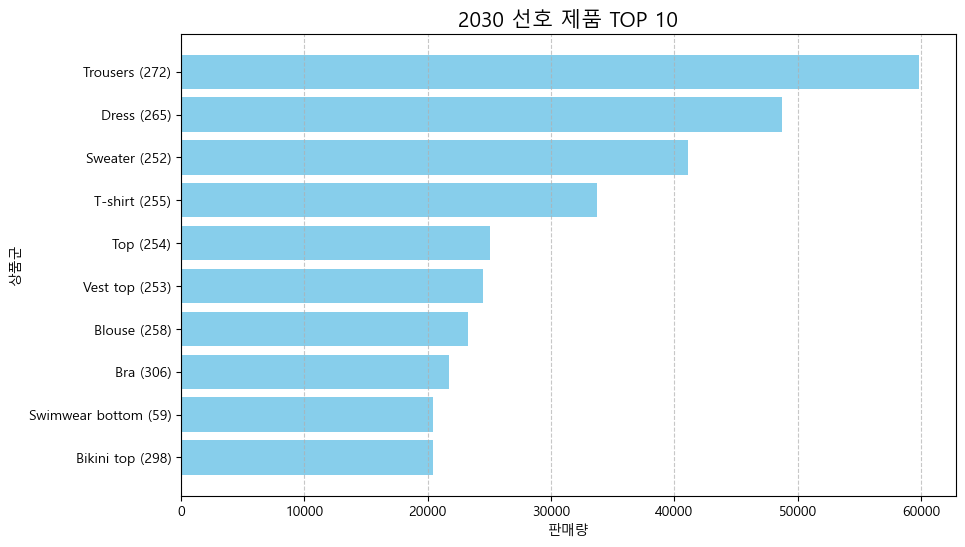

In [27]:
plt.figure(figsize=(10, 6))
plt.barh(top_10.index, top_10.values, color='skyblue') 

plt.gca().invert_yaxis() 
plt.title("2030 선호 제품 TOP 10", fontsize=15)
plt.xlabel("판매량")
plt.ylabel("상품군")
plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.show()

# 2030 선호 색상 판매량 TOP 10


In [54]:
color_2030= df_2030.groupby('Perceived_Colour_Master_Info').size().nlargest(10)
color_2030

Perceived_Colour_Master_Info
Black (5)           172265
White (9)            66466
Blue (2)             64065
Beige (11)           31047
Red (18)             28557
Grey (12)            26668
Pink (4)             22301
Green (19)           13874
Yellow (8)           12756
Khaki green (20)     12558
dtype: int64

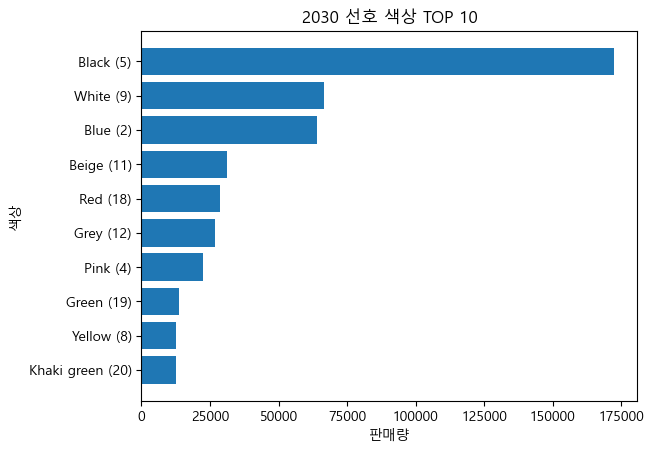

In [56]:
plt.barh(color_2030.index, color_2030.values)
plt.gca().invert_yaxis()

plt.title("2030 선호 색상 TOP 10")
plt.xlabel("판매량")
plt.ylabel("색상")
plt.show()

# 2030 선호 패턴 판매량 TOP 10

In [57]:
appear_2030= df_2030.groupby('Graphical_Appearance_Info').size().nlargest(10)
appear_2030

Graphical_Appearance_Info
Solid (1010016)               274647
All over pattern (1010001)     67863
Denim (1010023)                28027
Melange (1010010)              27026
Stripe (1010017)               26212
Lace (1010021)                 11651
Other structure (1010026)       8988
Check (1010004)                 8311
Placement print (1010014)       6348
Embroidery (1010007)            4336
dtype: int64

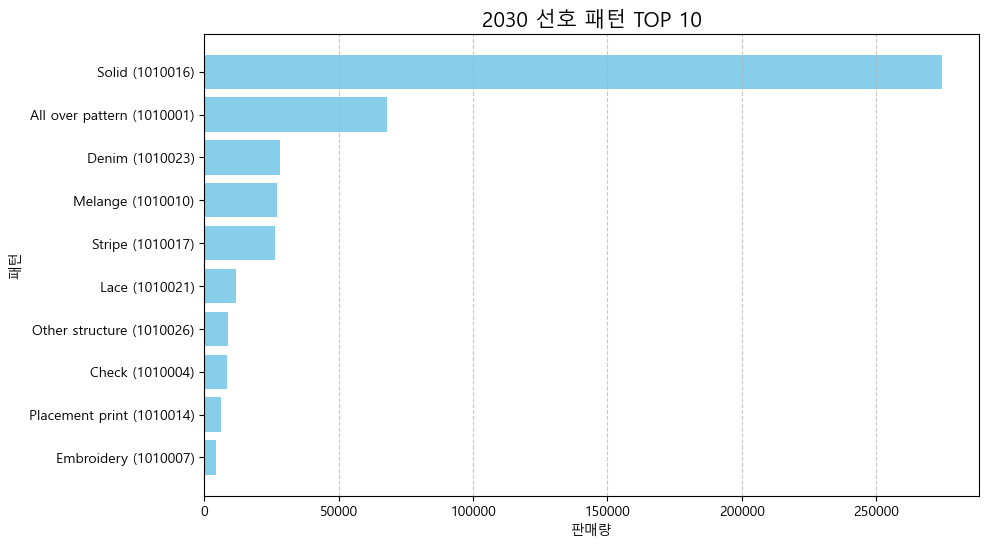

In [58]:
plt.figure(figsize=(10, 6))
plt.barh(appear_2030.index, appear_2030.values, color='skyblue') 

plt.gca().invert_yaxis() 
plt.title("2030 선호 패턴 TOP 10", fontsize=15)
plt.xlabel("판매량")
plt.ylabel("패턴")
plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.show()

# 2030 선호 패턴 및 디자인 판매량 TOP 10

trouser>dress>sweater  인기 순에서 인기 색깔, 패턴, 소재는 무엇일까?

사용 컬럼
- Perceived_Colour_Master_Info # 색깔
- Graphical_Appearance_Info  # 패턴


In [ ]:
# trouser>dress>sweater 

top_items = ['trousers', 'dress', 'sweater']

for item in top_items:
    print(f"[{item}] 인기 속성 TOP 5")
    

    items_df = df_2030[df_2030['Product_Type_Info'].str.contains(item, case=False, na=False)]
    
    
    print(f"[색상]\n{items_df['Perceived_Colour_Master_Info'].value_counts().head(5).index.tolist()}")
    print(f"[패턴]\n{items_df['Graphical_Appearance_Info'].value_counts().head(5).index.tolist()}")
    print(f"[소재/그룹]\n{items_df['Garment_Group_Info'].value_counts().head(5).index.tolist()}")
    print("-" * 40)



[trousers] 인기 속성 TOP 5
[색상]
['Black (5)', 'Blue (2)', 'Grey (12)', 'White (9)', 'Beige (11)']
[패턴]
['Solid (1010016)', 'Denim (1010023)', 'All over pattern (1010001)', 'Stripe (1010017)', 'Check (1010004)']
[소재/그룹]
['Trousers (1009)', 'Trousers Denim (1016)', 'Jersey Fancy (1005)', 'Jersey Basic (1002)', 'Unknown (1001)']
----------------------------------------
[dress] 인기 속성 TOP 5
[색상]
['Black (5)', 'White (9)', 'Blue (2)', 'Red (18)', 'Beige (11)']
[패턴]
['Solid (1010016)', 'All over pattern (1010001)', 'Stripe (1010017)', 'Lace (1010021)', 'Dot (1010006)']
[소재/그룹]
['Dresses Ladies (1013)', 'Jersey Fancy (1005)', 'Jersey Basic (1002)', 'Blouses (1010)', 'Unknown (1001)']
----------------------------------------
[sweater] 인기 속성 TOP 5
[색상]
['Black (5)', 'Grey (12)', 'White (9)', 'Beige (11)', 'Blue (2)']
[패턴]
['Solid (1010016)', 'Melange (1010010)', 'Stripe (1010017)', 'Colour blocking (1010005)', 'Placement print (1010014)']
[소재/그룹]
['Knitwear (1003)', 'Jersey Fancy (1005)', 'Jersey Ba

# top_items = ['trousers', 'dress', 'sweater'] 사용하기 위해
 #데이터 필터링 (대소문자 무시) 

C:\Users\fists\AppData\Local\Temp\ipykernel_7520\3781583206.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_data.values, y=top_data.index, ax=axes[i, j], palette='magma')
C:\Users\fists\AppData\Local\Temp\ipykernel_7520\3781583206.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_data.values, y=top_data.index, ax=axes[i, j], palette='magma')
C:\Users\fists\AppData\Local\Temp\ipykernel_7520\3781583206.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_data.values, y=top_data.index, ax=axes[i, j], palette='magma')
C

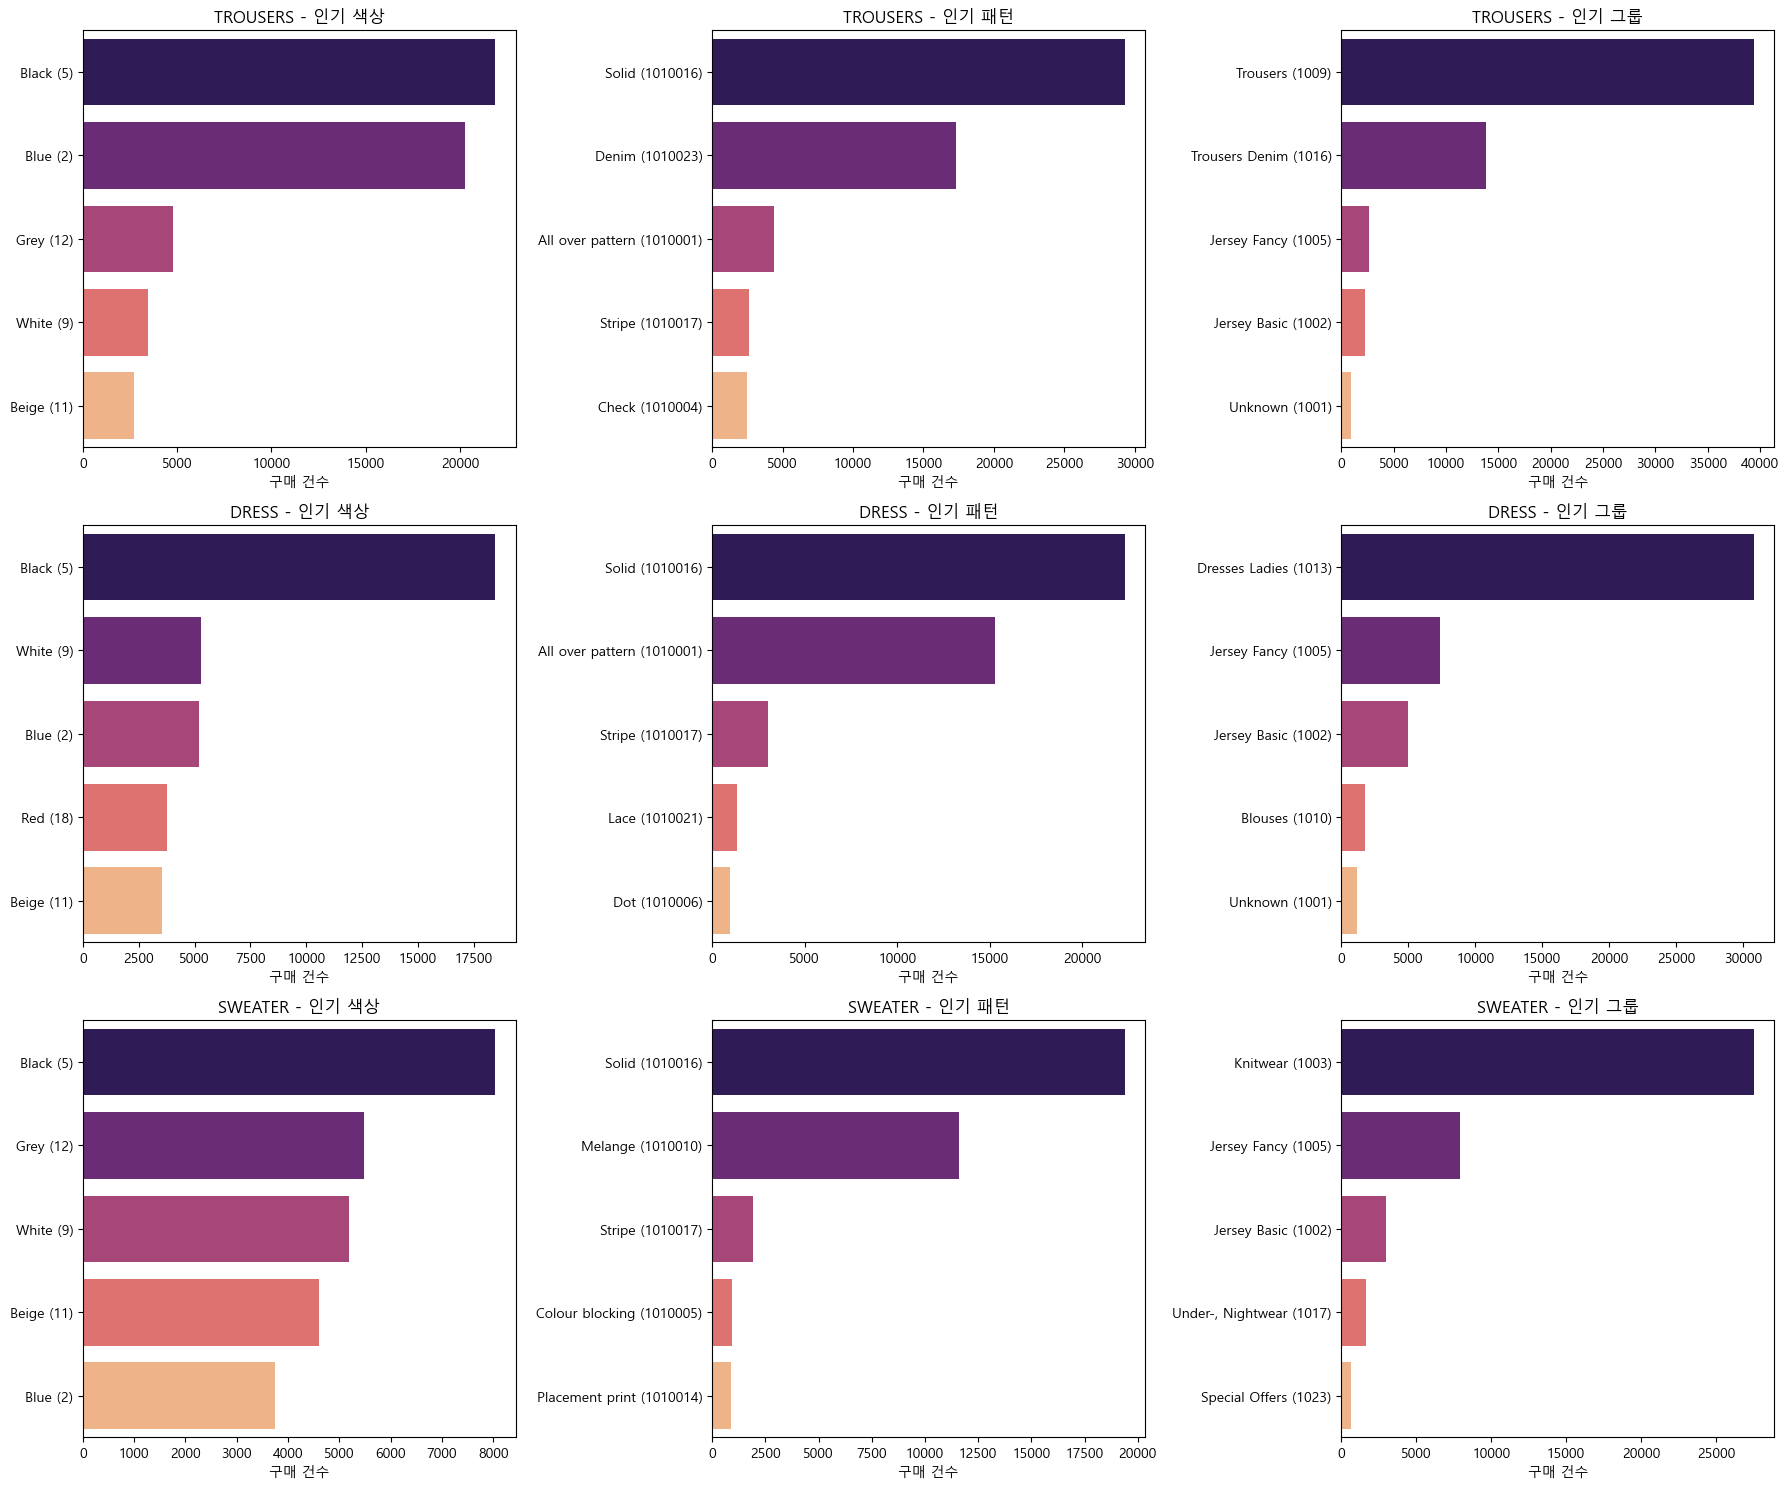

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

top_items = ['trousers', 'dress', 'sweater']
attributes = [
    ('Perceived_Colour_Master_Info', '인기 색상'),
    ('Graphical_Appearance_Info', '인기 패턴'),
    ('Garment_Group_Info', '인기 그룹')
]

# 3행(아이템별) x 3열(속성별) 서브플롯 생성
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 방지

for i, item in enumerate(top_items):
                               #데이터 필터링 (대소문자 무시) 
    items_df = df_2030[df_2030['Product_Type_Info'].str.contains(item, case=False, na=False)]
    
    for j, (col, title) in enumerate(attributes):
        top_data = items_df[col].value_counts().head(5)
        
        # 막대 그래프 그리기
        sns.barplot(x=top_data.values, y=top_data.index, ax=axes[i, j], palette='magma')
        
       
        axes[i, j].set_title(f"{item.upper()} - {title}", fontsize=12)
        axes[i, j].set_xlabel("구매 건수")
        axes[i, j].set_ylabel("")

plt.tight_layout()
plt.show()

# 인사이트


1. [trouser] 
> Black과 Blue가 압도적이고, Solid(무늬 없음)가 1위인 점을 볼 때, 스웨덴 2030은 유행을 크게 타지 않는 실용적인 기본 아이템에 지출이 대부분이고 trouser와 denim 등 일상 생활에서 입는 옷을 선호한다는 점에서 격식을 차리는 옷보다는 활동성이 좋은 캐주얼 및 스포티즘을 선호


- trouser: 일반 정장바지, 슬랙스, 면바지 등 기본적인 직조(woven)바지
- denim : 청바지
- jersey fancy : 신축성있는 소재 옷 + 화려한 디자인 트레이닝 팬츠, 조거 팬츠 등
- jersey basic : 기본적인 레깅스, 홈웨어 바지 등 

2. [dress]
> black 외 다른 색깔 군의 분포가 균일하며, 무지와 패턴 강한 옷의 선호도가 높음
trouser에 비해 색상와 패턴이 다양하게 분산되어있음. trouser에 비해 dress는 기본템보다는 
자신의 개성을 드러내거나 특별한 날을 위해 소비하는 경향 있음. 
- solid : 무지 디자인. 가장 기본적
- denim : 청바지 조직감
- all over pattern : 온 전체에 일정 문양 있는 패턴

3. [sweater]
> 전체 상품에서 가장 높은 선호 색깔이 black, blue 임에도 불구하고 sweater 에서는 grey, white, beige 등 단조롭고 무난한 색깔이 인기 좋음. 패턴 및 소재또한 니트소재에 무지, melange(혼합색) 으로 세련되고 부드러운 느낌을 선호함. 
- special offers ; 시즌 오프나 프로모션 용 특가 상품

최종 인사이트 : 
- 블랙, 블루 & 무지,데님 패턴 선호로 봤을 때 2030은 하의를 살 때 실패 없는 '기본템'을 선호한다
- 바지에 비해 다양한 색상과 패턴을 보이는 원피스/니트(상의)로 봤을 때 자신의 개성을 적극 표현하는 소비패턴을 보인다 
- 모든 상품군의 패턴에서 무지가 압도적으로 높은 걸로 보았을때, 2030은 캐주얼&실용주의 스타일을 추구하는 것으로 보인다. 
- 2030 매출 전략을 위해 디자인 방향성은 "캐주얼&실용주의" 로 정하고, 하의는 기본형에 집중하되 상의는 다양함을 주는 패턴을 활용한다. 



# trouser, dress, sweater 재구매율 !


In [ ]:
# 분석할 키워드 리스트
target_items = ['trousers', 'dress', 'sweater']
reorder_results = {}

for item in target_items:
   
    item_df = df_2030[df_2030['Product_Type_Info'].str.contains(item, case=False, na=False)]
    
    purchase_counts = item_df.groupby('Customer_Id').size() # 고객별 구매 건수 카운트
    
    total_customers = len(purchase_counts)
    repeat_customers = len(purchase_counts[purchase_counts >= 2]) #구매 횟수가 2번이상인 고객수
    
    
    reorder_rate = (repeat_customers / total_customers * 100) if total_customers > 0 else 0
    reorder_results[item] = round(reorder_rate, 2)


print("2030 아이템별 재구매율")
for item, rate in reorder_results.items():
    print(f"- {item.capitalize()}: {rate}%")

2030 아이템별 재구매율
- Trousers: 20.28%
- Dress: 19.8%
- Sweater: 15.16%


인사이트 
- trouser : 가장 높은 충성도
- dress : 2030 여성층의 강력한 팬덤 소비 존재함
- sweater : 계절성 특성이 강해 반복 구매가 일어나기 어렵기 때문에 유행 덜 민감한 패턴을 선호한다고 생각됨. 
2030 아이템 재구매율 이 Trousers > Dress > Sweater 이 순서로 인기 판매 순위와 일치한다. 또한 Trousers가 20.28%로 재구매율이 가장 높게 나왔는데 이는 2030세대에게 소모품이자 가장 신뢰받는 기본템 임을 증명하는 수치로 생각됨. 

In [ ]:

reorder_results = {}

for item in target_items:
   
    item_df = df_2030[df_2030['Product_Type_Info'].str.contains(item, case=False, na=False)]
    
    purchase_counts = item_df.groupby('Customer_Id').size() # 고객별 구매 건수 카운트
    
    total_customers = len(purchase_counts)
    repeat_customers = len(purchase_counts[purchase_counts >= 2]) #구매 횟수가 2번이상인 고객수
    
    
    reorder_rate = (repeat_customers / total_customers * 100) if total_customers > 0 else 0
    reorder_results[item] = round(reorder_rate, 2)


print("2030 아이템별 재구매율")
for item, rate in reorder_results.items():
    print(f"- {item.capitalize()}: {rate}%")

In [ ]:
# 상위 10개 
top_10 = df_2030.groupby('Section_Info').size().nlargest(10)

print("2030 선호 제품 TOP 10")
print(top_10)

2030 선호 제품 TOP 10
Section_Info
Womens Everyday Collection (15)        92505
Divided Collection (53)                62538
Womens Swimwear, beachwear (60)        45015
Womens Lingerie (61)                   35880
Womens Tailoring (11)                  29504
Womens Everyday Basics (16)            23102
Divided Basics (51)                    20997
Ladies H&M Sport (5)                   18297
Womens Nightwear, Socks & Tigh (62)    17162
Womens Casual (6)                      16572
dtype: int64


In [ ]:
plt.barh(df_2030['Garment_Group_Info'])
plt.gca().invert_yaxis()

plt.title("2030 선호 제품 TOP 10")
plt.xlabel("판매량")
plt.ylabel("")
plt.show()

### 채널 - 연령대 판매량

In [ ]:
age_channel_cnt = df.groupby(['Age_Group', 'Sales_Channel_Id']).size().reset_index(name='Purchase_Cnt')

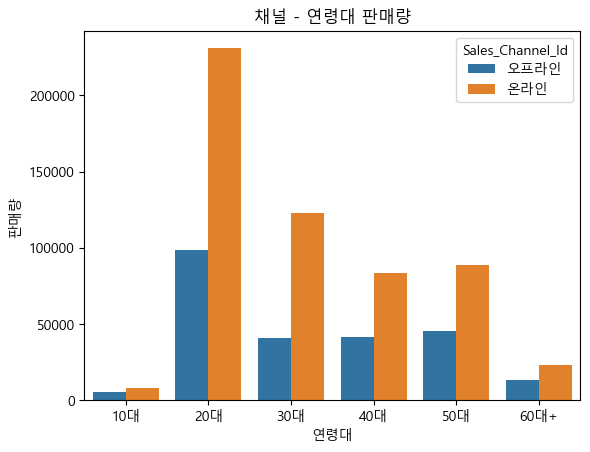

In [ ]:
sns.barplot(data=age_channel_cnt, x='Age_Group', y='Purchase_Cnt', hue='Sales_Channel_Id')

plt.title("채널 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.show()

### 상품군별 판매량 TOP 10

In [ ]:
product_cnt = df.groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
product_cnt

,Product_Type_Info,Purchase_Cnt
97,Trousers (272),105465
25,Dress (265),80749
87,Sweater (252),70385
92,T-shirt (255),56036
95,Top (254),41753
9,Blouse (258),40494
107,Vest top (253),37281
76,Shorts (274),32993
13,Bra (306),31788
89,Swimwear bottom (59),30166


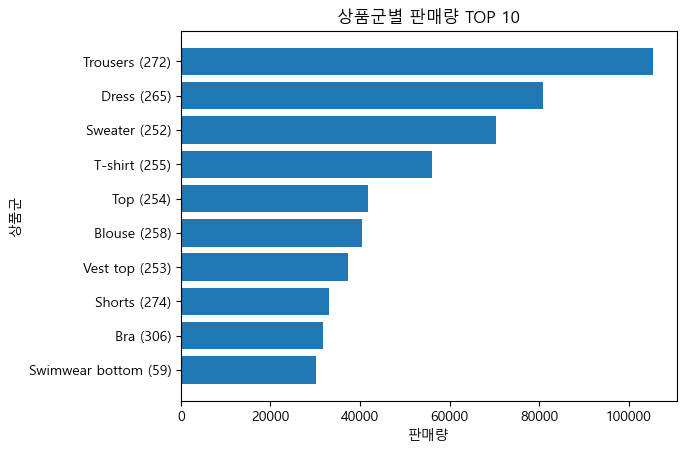

In [ ]:
plt.barh(product_cnt['Product_Type_Info'], product_cnt['Purchase_Cnt'])
plt.gca().invert_yaxis()

plt.title("상품군별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("상품군")
plt.show()

### 상품군 - 연령대 판매량

In [ ]:
product_age_cnt = df.groupby(['Product_Type_Info', 'Age_Group']).size().reset_index(name='Purchase_Cnt')

In [ ]:
top_products = product_cnt['Product_Type_Info'].tolist()

# 판매량 TOP 10 상품군만 필터링
product_age_cnt_top = product_age_cnt[product_age_cnt['Product_Type_Info'].isin(top_products)]

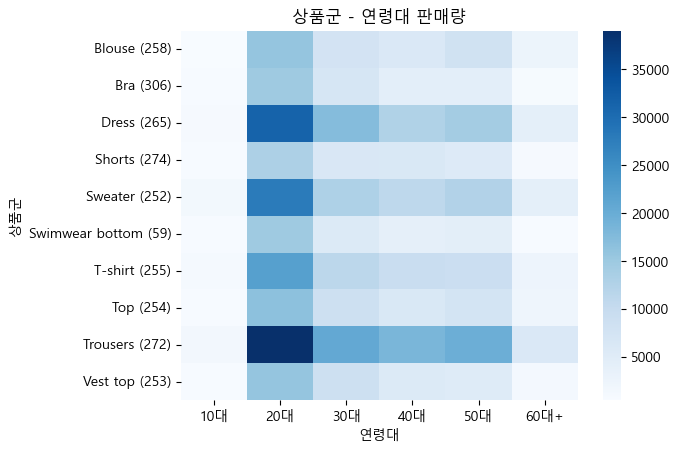

In [ ]:
pivot_1 = product_age_cnt_top.pivot(index='Product_Type_Info', columns='Age_Group', values='Purchase_Cnt')

sns.heatmap(pivot_1, cmap="Blues")
plt.title("상품군 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("상품군")
plt.show()


### 연령대별 1인당 평균 구매 건수

In [ ]:
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique()
age_purchase_cnt = df.groupby('Age_Group').size()

age_frequency = (age_purchase_cnt / age_customer_cnt).reset_index()
age_frequency.columns = ['Age_Group', 'Avg_Purchase_Per_Customer']

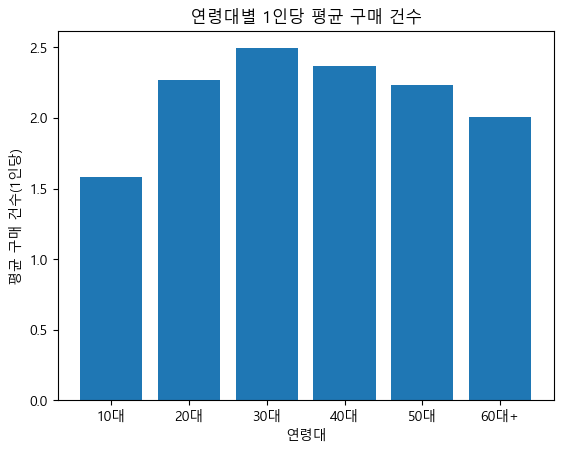

In [ ]:
plt.bar(age_frequency['Age_Group'], age_frequency['Avg_Purchase_Per_Customer'])

plt.title("연령대별 1인당 평균 구매 건수")
plt.xlabel("연령대")
plt.ylabel("평균 구매 건수(1인당)")
plt.show()


### 연령대별 구매 고객 수

In [ ]:
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique().reset_index(name='Customer_Count')

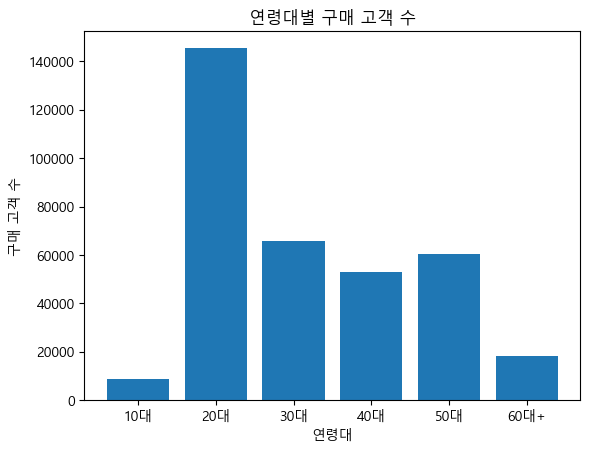

In [ ]:
plt.bar(age_customer_cnt['Age_Group'], age_customer_cnt['Customer_Count'])

plt.title("연령대별 구매 고객 수")
plt.xlabel("연령대")
plt.ylabel("구매 고객 수")
plt.show()